In [1]:
%matplotlib inline

In [2]:
import datajoint as dj

In [3]:
dj.list_schemas()

Connecting cinni@db.data-science-ust.net:3306


['cinni_uni', 'cinni_university']

In [5]:
import datajoint as dj
schema = dj.schema('cinni_university')
schema.spawn_missing_classes()

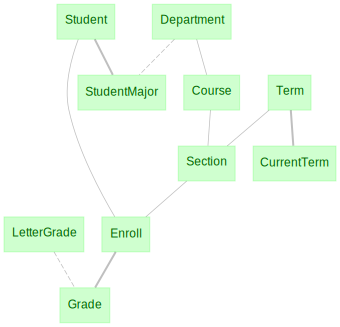

In [6]:
dj.Diagram(schema)

In [7]:
dj.U().aggr(Student(), n='count(*)')

n calculated attribute
1500


In [ ]:
dj.U('birth_year').aggr(Student.proj(birth_year='year(date_of_birth)'), n='count(*)').make_sql()

In [9]:
fem_texans = Student() & {'home_state':'TX','sex':'F'}

In [12]:
fem_texans.make_sql()

"SELECT * FROM `cinni_university`.`student` WHERE ((`home_state`='TX') AND (`sex`='F'))"

SyntaxError: invalid syntax (<ipython-input-13-4631946df351>, line 1)

In [ ]:
dj.U('birth_year') & Student.proj(birth_year='year(date_of_birth)')

In [ ]:
Student.describe();

In [ ]:
dj.ERD(schema)

In [ ]:
dj.U().aggr(Student, n='count(*)')

In [ ]:
StudentMajor()

In [ ]:
LetterGrade.aggr(Grade & CurrentTerm & 'dept="MATH"', n='count(*)')

dj.U('grade').aggr(Grade & CurrentTerm & 'dept="MATH"', n='count(*)')

# Example queries

## Restriction

In [14]:
# Students from Texas
Student & {'home_state': 'TX'}
Student & 'home_state="TX"'

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1011,David,Fry,M,1992-04-13,7758 Emily Mountain Suite 310,Westton,TX,17384,001-523-409-4517
1062,Kelly,Nelson,F,1994-11-08,23752 Katelyn Skyway,Harristown,TX,64797,822.263.8871x7834
1063,Dorothy,Jackson,F,1985-12-23,3840 Austin Spurs Suite 554,Boydville,TX,73112,(975)979-3567
1145,Krystal,Tran,F,1999-04-24,41931 Velez Spurs Apt. 452,West Nathan,TX,50117,001-047-628-2440x072
1149,Zachary,Nichols,M,1990-07-15,3283 Espinoza Unions Apt. 784,Wuview,TX,60681,082.237.1394x1031
1195,Tanya,Weeks,F,1999-12-12,859 Smith Village Apt. 662,Port Emilychester,TX,35008,001-273-912-9198x934
1278,Mrs.,Kimberly,F,2004-08-09,826 Victoria Light Suite 160,Nielsenshire,TX,69264,918.596.4281x7463
1324,Sandra,Carter,F,1986-03-17,58085 Sandra Forest Apt. 246,Bankston,TX,35423,(553)502-3188x08590
1338,Suzanne,Fletcher,F,2000-10-24,880 Johnson Turnpike Suite 298,Lake Christianside,TX,56230,540.219.6854x8913
1390,John,Pacheco,M,2001-04-24,9582 Murphy Street Apt. 206,North Jennifermouth,TX,36395,(591)185-8443x72690


In [15]:
# Male students from outside Texas
(Student & 'sex="M"')- {'home_state': 'TX'}

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1002,Alan,Vasquez,M,1987-08-07,410 Burton Throughway Suite 758,Coopershire,MS,09722,001-838-846-9491
1004,Robert,Davis,M,1990-03-06,5030 Robert Square Apt. 532,North Curtischester,CA,50038,(974)377-3167x458
1007,David,Thornton,M,1998-01-27,32239 Wayne Islands Apt. 659,Reedton,HI,11377,013-814-2923
1008,Paul,Miller,M,1988-03-26,5872 Sandra Freeway Apt. 797,South Richardport,ME,19277,+1-462-203-5730x917
1009,Patrick,Anderson,M,2003-12-22,8253 Brandy Junctions Suite 004,Laurenville,ME,78172,(608)525-6788x99495
1010,Jacob,Horton,M,1993-03-23,9394 Ramirez Forest,Brownside,ND,69042,(912)108-8205x19334
1013,Timothy,Porter,M,1993-08-18,71826 Jacob Forge Suite 500,New Diamondland,MS,14854,9811159190
1014,Victor,Perez,M,1995-09-03,02262 Roberts Mill Suite 423,Jodiside,WV,05340,664-387-0627x3503
1015,Eddie,Cole,M,1990-10-19,6176 Coleman Grove Apt. 940,East Jamesville,MN,74913,(879)735-8984
1016,James,Brown,M,2003-12-29,2989 Catherine Flat,Timothyport,OK,88162,022.802.9302


In [16]:
# Male students from outside Texas
Student & {'sex="M" and home_state <> "TX"'}
(Student & {'sex':"M"}) - {'home_state': "TX"}

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1002,Alan,Vasquez,M,1987-08-07,410 Burton Throughway Suite 758,Coopershire,MS,09722,001-838-846-9491
1004,Robert,Davis,M,1990-03-06,5030 Robert Square Apt. 532,North Curtischester,CA,50038,(974)377-3167x458
1007,David,Thornton,M,1998-01-27,32239 Wayne Islands Apt. 659,Reedton,HI,11377,013-814-2923
1008,Paul,Miller,M,1988-03-26,5872 Sandra Freeway Apt. 797,South Richardport,ME,19277,+1-462-203-5730x917
1009,Patrick,Anderson,M,2003-12-22,8253 Brandy Junctions Suite 004,Laurenville,ME,78172,(608)525-6788x99495
1010,Jacob,Horton,M,1993-03-23,9394 Ramirez Forest,Brownside,ND,69042,(912)108-8205x19334
1013,Timothy,Porter,M,1993-08-18,71826 Jacob Forge Suite 500,New Diamondland,MS,14854,9811159190
1014,Victor,Perez,M,1995-09-03,02262 Roberts Mill Suite 423,Jodiside,WV,05340,664-387-0627x3503
1015,Eddie,Cole,M,1990-10-19,6176 Coleman Grove Apt. 940,East Jamesville,MN,74913,(879)735-8984
1016,James,Brown,M,2003-12-29,2989 Catherine Flat,Timothyport,OK,88162,022.802.9302


In [17]:
# Students from TX, OK, or NM
Student & [{'home_state':'OK'}, {'home_state':'NM'}, {'home_state':'TX'}] 
Student & [{'home_state': s} for s in ('OK','NM','TX')]
Student & 'home_state in ("OK", "NM", "TX")'

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1006,Elizabeth,Jones,F,1999-05-28,65233 Theresa Route Apt. 069,Annview,OK,17712,155.836.9246
1011,David,Fry,M,1992-04-13,7758 Emily Mountain Suite 310,Westton,TX,17384,001-523-409-4517
1016,James,Brown,M,2003-12-29,2989 Catherine Flat,Timothyport,OK,88162,022.802.9302
1037,Dr.,Michael,M,1986-09-11,292 Hooper Ranch,Harringtonbury,OK,94116,(014)525-5822
1062,Kelly,Nelson,F,1994-11-08,23752 Katelyn Skyway,Harristown,TX,64797,822.263.8871x7834
1063,Dorothy,Jackson,F,1985-12-23,3840 Austin Spurs Suite 554,Boydville,TX,73112,(975)979-3567
1067,Brandon,Lopez,M,2005-03-23,2524 Toni Village,Davidfort,NM,56313,001-923-684-1455x929
1080,Mary,Morris,F,2002-07-30,78872 Jeffrey Prairie,Rothmouth,NM,33865,+1-129-434-8217x9604
1088,Andre,Turner,M,1985-11-04,36368 Thompson Ranch Suite 918,Ryanside,OK,58210,3317807298
1094,Brad,Garcia,M,1988-10-06,53991 Farley Plains,East Felicia,OK,61355,001-432-141-0899x074


In [19]:
# Millenials
millenials = Student & 'date_of_birth between "1981-01-01" and "1996-12-31"'

In [20]:
(millenials - (Enroll & 'dept="MATH"')).make_sql()

'SELECT * FROM `cinni_university`.`student` WHERE (date_of_birth between "1981-01-01" and "1996-12-31") AND ((`student_id`) not in (SELECT `student_id` FROM `cinni_university`.`enroll` WHERE (dept="MATH")))'

In [21]:
# Students who have taken classes
Student & Enroll

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1000,Kimberly,Thomas,F,1991-07-26,851 Beverly Neck Suite 918,West Elizabethmouth,NY,43733,9263148671
1001,Kelsey,Ortiz,F,1987-04-12,969 Brady Prairie,North Carl,NC,45561,740.419.5209
1002,Alan,Vasquez,M,1987-08-07,410 Burton Throughway Suite 758,Coopershire,MS,09722,001-838-846-9491
1003,Lisa,Carey,F,2002-03-29,21881 Maria Branch,Port Christopher,WA,13740,815.277.7140
1004,Robert,Davis,M,1990-03-06,5030 Robert Square Apt. 532,North Curtischester,CA,50038,(974)377-3167x458
1005,Veronica,Scott,F,2002-09-23,6735 Monica Streets Suite 378,Lake Gregoryberg,DE,91515,(400)133-1762
1007,David,Thornton,M,1998-01-27,32239 Wayne Islands Apt. 659,Reedton,HI,11377,013-814-2923
1008,Paul,Miller,M,1988-03-26,5872 Sandra Freeway Apt. 797,South Richardport,ME,19277,+1-462-203-5730x917
1009,Patrick,Anderson,M,2003-12-22,8253 Brandy Junctions Suite 004,Laurenville,ME,78172,(608)525-6788x99495
1010,Jacob,Horton,M,1993-03-23,9394 Ramirez Forest,Brownside,ND,69042,(912)108-8205x19334


In [22]:
# Students who have not taken classes
Student - Enroll

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1006,Elizabeth,Jones,F,1999-05-28,65233 Theresa Route Apt. 069,Annview,OK,17712,155.836.9246
1012,Kathryn,Fuller,F,1993-10-31,030 Jacqueline Avenue Suite 859,North Lisaberg,SC,31447,(634)704-5724
1018,Amanda,Brown,F,1996-02-14,32986 Walsh Islands Suite 345,East Ethan,DC,65965,(368)274-7361x11281
1030,Daniel,Sanchez,M,2001-01-22,277 Marcus Rest Suite 438,Meghanside,CO,81160,001-692-247-1872x779
1045,Katherine,Moore,F,1988-06-08,264 Susan Cliff Apt. 558,Welchshire,WA,47826,(094)609-0139
1053,Austin,Harris,M,2004-08-24,663 Elizabeth Square,New Stephenmouth,GA,05766,762.675.3047x1986
1068,Mary,Hernandez,F,2002-04-13,93997 Edwards Avenue Suite 906,North Scott,PA,93639,341-097-5425
1071,Carrie,Johnson,F,1988-03-30,3412 Lopez Corners Suite 275,Lovemouth,VT,86546,463-146-4217x79434
1077,Randall,Rosario,M,1992-02-09,61740 Kiara Causeway,South Abigail,RI,26977,+1-354-487-8730x8027
1079,Teresa,Torres,F,2004-05-23,717 Clark Lake,Hoodshire,AR,55160,198.010.0543x846


In [23]:
# Students who have taken Biology classes but no MATH courses
(Student & (Enroll & 'dept="BIOL"')) - (Enroll & 'dept="MATH"')

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1009,Patrick,Anderson,M,2003-12-22,8253 Brandy Junctions Suite 004,Laurenville,ME,78172,(608)525-6788x99495
1022,Derrick,Ortiz,M,1990-06-17,74457 Garcia Parks,New Traciefurt,ID,74668,001-782-730-4322x449
1025,Melissa,Gibbs,F,1995-07-18,93501 Scott Springs,South Georgeland,NY,84289,001-912-358-0087x877
1031,Benjamin,Miller,M,1991-11-03,4922 Johnson Dale Apt. 847,East Jennifer,MT,99429,001-020-338-4607
1042,Courtney,Ryan,F,1999-03-24,570 Vanessa Skyway Apt. 979,Mckinneyview,SD,42906,(536)199-2719x51792
1044,Daniel,Miller,M,1999-03-01,962 Barry Tunnel Suite 729,Crystalborough,PA,82953,388-175-3106
1049,Monica,Simon,F,2001-08-05,24302 Michael Brook,Lake Veronica,KS,62428,001-147-094-0991x272
1055,Aaron,Williams,M,1993-12-13,58155 Rodriguez Flats,Barkerview,LA,17771,+1-853-222-1890
1058,Brandon,Kelly,M,1994-02-22,25199 Sean Point Suite 930,South Josephport,WA,61443,098.642.9888x263
1089,Mrs.,Danielle,F,1986-10-25,494 Sherman Parkway Suite 211,Newtonmouth,MD,78813,(879)709-0037


In [24]:
# Students who have not selected a major
Student - StudentMajor

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1000,Kimberly,Thomas,F,1991-07-26,851 Beverly Neck Suite 918,West Elizabethmouth,NY,43733,9263148671
1001,Kelsey,Ortiz,F,1987-04-12,969 Brady Prairie,North Carl,NC,45561,740.419.5209
1002,Alan,Vasquez,M,1987-08-07,410 Burton Throughway Suite 758,Coopershire,MS,09722,001-838-846-9491
1003,Lisa,Carey,F,2002-03-29,21881 Maria Branch,Port Christopher,WA,13740,815.277.7140
1004,Robert,Davis,M,1990-03-06,5030 Robert Square Apt. 532,North Curtischester,CA,50038,(974)377-3167x458
1005,Veronica,Scott,F,2002-09-23,6735 Monica Streets Suite 378,Lake Gregoryberg,DE,91515,(400)133-1762
1006,Elizabeth,Jones,F,1999-05-28,65233 Theresa Route Apt. 069,Annview,OK,17712,155.836.9246
1007,David,Thornton,M,1998-01-27,32239 Wayne Islands Apt. 659,Reedton,HI,11377,013-814-2923
1008,Paul,Miller,M,1988-03-26,5872 Sandra Freeway Apt. 797,South Richardport,ME,19277,+1-462-203-5730x917
1009,Patrick,Anderson,M,2003-12-22,8253 Brandy Junctions Suite 004,Laurenville,ME,78172,(608)525-6788x99495


In [25]:
# Students who are taking courses in the current term
Student - (Enroll & CurrentTerm)

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1000,Kimberly,Thomas,F,1991-07-26,851 Beverly Neck Suite 918,West Elizabethmouth,NY,43733,9263148671
1001,Kelsey,Ortiz,F,1987-04-12,969 Brady Prairie,North Carl,NC,45561,740.419.5209
1002,Alan,Vasquez,M,1987-08-07,410 Burton Throughway Suite 758,Coopershire,MS,09722,001-838-846-9491
1003,Lisa,Carey,F,2002-03-29,21881 Maria Branch,Port Christopher,WA,13740,815.277.7140
1004,Robert,Davis,M,1990-03-06,5030 Robert Square Apt. 532,North Curtischester,CA,50038,(974)377-3167x458
1005,Veronica,Scott,F,2002-09-23,6735 Monica Streets Suite 378,Lake Gregoryberg,DE,91515,(400)133-1762
1006,Elizabeth,Jones,F,1999-05-28,65233 Theresa Route Apt. 069,Annview,OK,17712,155.836.9246
1007,David,Thornton,M,1998-01-27,32239 Wayne Islands Apt. 659,Reedton,HI,11377,013-814-2923
1008,Paul,Miller,M,1988-03-26,5872 Sandra Freeway Apt. 797,South Richardport,ME,19277,+1-462-203-5730x917
1009,Patrick,Anderson,M,2003-12-22,8253 Brandy Junctions Suite 004,Laurenville,ME,78172,(608)525-6788x99495


In [26]:
# Ungraded courses
Enroll - Grade

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section
1000,BIOL,2210,2007,Fall,a
1000,BIOL,2330,2008,Spring,a
1000,BIOL,2420,2007,Fall,a
1000,CS,3500,2007,Fall,a
1000,CS,4000,2008,Spring,a
1000,CS,4150,2008,Summer,b
1000,CS,4150,2008,Summer,c
1000,CS,4500,2007,Summer,b
1000,MATH,1220,2008,Summer,d
1000,MATH,2280,2008,Spring,a


In [27]:
# Ungraded courses in the current term
(Enroll & CurrentTerm) - Grade

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section
1016,CS,1410,2018,Fall,b
1016,CS,3505,2018,Fall,a
1016,PHYS,2060,2018,Fall,a
1023,BIOL,1210,2018,Fall,a
1023,BIOL,2330,2018,Fall,b
1023,MATH,3220,2018,Fall,a
1026,BIOL,2330,2018,Fall,b
1026,BIOL,2355,2018,Fall,b
1026,MATH,2210,2018,Fall,a
1026,PHYS,3210,2018,Fall,a


In [28]:
# Students who have taken classes and have chosen a major
(Student & Enroll & StudentMajor).fetch(as_dict=True)

[]

In [29]:
#Students who have taken classes or have chosen a major
Student & [Enroll, StudentMajor]

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1000,Kimberly,Thomas,F,1991-07-26,851 Beverly Neck Suite 918,West Elizabethmouth,NY,43733,9263148671
1001,Kelsey,Ortiz,F,1987-04-12,969 Brady Prairie,North Carl,NC,45561,740.419.5209
1002,Alan,Vasquez,M,1987-08-07,410 Burton Throughway Suite 758,Coopershire,MS,09722,001-838-846-9491
1003,Lisa,Carey,F,2002-03-29,21881 Maria Branch,Port Christopher,WA,13740,815.277.7140
1004,Robert,Davis,M,1990-03-06,5030 Robert Square Apt. 532,North Curtischester,CA,50038,(974)377-3167x458
1005,Veronica,Scott,F,2002-09-23,6735 Monica Streets Suite 378,Lake Gregoryberg,DE,91515,(400)133-1762
1007,David,Thornton,M,1998-01-27,32239 Wayne Islands Apt. 659,Reedton,HI,11377,013-814-2923
1008,Paul,Miller,M,1988-03-26,5872 Sandra Freeway Apt. 797,South Richardport,ME,19277,+1-462-203-5730x917
1009,Patrick,Anderson,M,2003-12-22,8253 Brandy Junctions Suite 004,Laurenville,ME,78172,(608)525-6788x99495
1010,Jacob,Horton,M,1993-03-23,9394 Ramirez Forest,Brownside,ND,69042,(912)108-8205x19334


In [38]:
# Enrollment in courses from the same department as the students' major
Enroll & StudentMajor

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section


## Join

In [39]:
# Grade point values
Grade * LetterGrade

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section,grade,points


In [40]:
# Graded enrollments with complete course and student information
Student * Enroll * Course * Section * Grade * LetterGrade

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section,grade,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881,"course_name e.g. ""Neurobiology of Sensation and Movement.""",credits number of credits earned by completing the course,auditorium,points


In [41]:
# Students with ungraded courses in current term
Student & (Enroll * CurrentTerm - Grade)

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1016,James,Brown,M,2003-12-29,2989 Catherine Flat,Timothyport,OK,88162,022.802.9302
1023,Todd,Combs,M,1986-08-07,02428 Gregory Haven Suite 512,Cunninghamfurt,IL,29468,+1-773-194-1744
1026,Terry,Vasquez,M,1989-11-18,285 Laura Dale,Port Ericville,KS,04583,+1-771-158-5502
1036,William,Sanford,M,1986-08-04,5381 Walsh Extension Suite 947,Bowenshire,NE,40564,434.941.4415x91499
1038,James,Bolton,M,1993-12-21,337 Dawn Extension Apt. 389,Jamesport,OR,74446,677.781.5983
1040,Alicia,Smith,F,1997-06-01,1171 Ortiz Heights,Kathleenburgh,NC,71033,026.019.2098x35980
1044,Daniel,Miller,M,1999-03-01,962 Barry Tunnel Suite 729,Crystalborough,PA,82953,388-175-3106
1050,Lisa,Taylor,F,1994-05-09,816 Heather Spur,Lake Matthew,NV,80883,(646)307-7286
1055,Aaron,Williams,M,1993-12-13,58155 Rodriguez Flats,Barkerview,LA,17771,+1-853-222-1890
1056,Amber,Snow,F,1993-09-16,48152 Phillips Crescent Suite 910,South Monique,KS,15242,359-255-6613x73513


In [42]:
# Enrollments before students' date of birth
Student * Enroll & 'term_year <= date_of_birth'

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1009,CS,4940,2003,Summer,a,Patrick,Anderson,M,2003-12-22,8253 Brandy Junctions Suite 004,Laurenville,ME,78172,(608)525-6788x99495
1027,BIOL,1006,1999,Fall,c,Patricia,Torres,F,2004-06-06,126 Robert Ville,Macdonaldton,SD,66756,001-053-932-5966x845
1027,BIOL,2030,1999,Fall,a,Patricia,Torres,F,2004-06-06,126 Robert Ville,Macdonaldton,SD,66756,001-053-932-5966x845
1027,BIOL,2210,2000,Spring,a,Patricia,Torres,F,2004-06-06,126 Robert Ville,Macdonaldton,SD,66756,001-053-932-5966x845
1027,BIOL,2355,1999,Summer,b,Patricia,Torres,F,2004-06-06,126 Robert Ville,Macdonaldton,SD,66756,001-053-932-5966x845
1027,CS,1030,2000,Summer,a,Patricia,Torres,F,2004-06-06,126 Robert Ville,Macdonaldton,SD,66756,001-053-932-5966x845
1027,CS,3200,1999,Fall,a,Patricia,Torres,F,2004-06-06,126 Robert Ville,Macdonaldton,SD,66756,001-053-932-5966x845
1027,CS,4940,1999,Fall,a,Patricia,Torres,F,2004-06-06,126 Robert Ville,Macdonaldton,SD,66756,001-053-932-5966x845
1027,CS,4970,1999,Summer,a,Patricia,Torres,F,2004-06-06,126 Robert Ville,Macdonaldton,SD,66756,001-053-932-5966x845
1027,MATH,2210,2000,Summer,a,Patricia,Torres,F,2004-06-06,126 Robert Ville,Macdonaldton,SD,66756,001-053-932-5966x845


## Proj

In [ ]:
# remove student personal info other than home state and sex
Student.proj('home_state', 'sex')

In [47]:
Student.proj('first_name')


student_id university-wide ID number,first_name
1000,Kimberly
1001,Kelsey
1002,Alan
1003,Lisa
1004,Robert
1005,Veronica
1006,Elizabeth
1007,David
1008,Paul
1009,Patrick


In [48]:
# Student major
Student.proj('first_name','last_name')*StudentMajor.proj(major='dept')

student_id university-wide ID number,first_name,last_name,"major abbreviated department name, e.g. BIOL"


In [49]:
# Enrollment with major information
Enroll * StudentMajor.proj(major='dept')

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section,"major abbreviated department name, e.g. BIOL"


In [50]:
# Enrollment outside chosen major
Enroll * StudentMajor.proj(major='dept') & 'major<>dept'

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section,"major abbreviated department name, e.g. BIOL"


In [51]:
# Enrollment not matching major 
Enroll - StudentMajor 

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section
1000,BIOL,2210,2007,Fall,a
1000,BIOL,2330,2008,Spring,a
1000,BIOL,2420,2007,Fall,a
1000,CS,3500,2007,Fall,a
1000,CS,4000,2008,Spring,a
1000,CS,4150,2008,Summer,b
1000,CS,4150,2008,Summer,c
1000,CS,4500,2007,Summer,b
1000,MATH,1220,2008,Summer,d
1000,MATH,2280,2008,Spring,a


In [52]:
# Total grade points
(Course * Grade * LetterGrade).proj(total='points*credits')

"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",student_id university-wide ID number,term_year,term,section,grade,total calculated attribute


## Aggr

In [ ]:
dj.U().aggr(Student(), n='count(*)')

In [ ]:
# Students in each section
Section.aggr(Enroll, n='count(*)')

In [ ]:
# Average grade in each course
Course.aggr(Grade*LetterGrade, avg_grade='avg(points)')

In [ ]:
# Fraction graded in each section
(Section.aggr(Enroll,n='count(*)') * Section.aggr(Grade, m='count(*)')).proj(
    'm','n',frac='m/n')

In [ ]:
# GPA
Student.aggr(Course * Grade * LetterGrade, 
             gpa='sum(points*credits)/sum(credits)')

In [ ]:
# GPA in current Term
Student.aggr(Course * Grade * LetterGrade & CurrentTerm, 
             gpa='sum(points*credits)/sum(credits)')

In [ ]:
# Average GPA for each major
gpa = Student.aggr(Course * Grade * LetterGrade,
                   gpa='sum(points*credits)/sum(credits)')
Department.aggr(StudentMajor*gpa, avg_gpa='avg(gpa)')

## Relation U

In [ ]:
# All home states
dj.U('home_state').aggr(Student, n='count(*)')

In [ ]:
# Unique last names
dj.U('last_name') & Student 

In [ ]:
# Number of students from each state by gender
dj.U('home_state', 'sex').aggr(Student, n='count(*)')

In [ ]:
# GPA by sex
dj.U('sex').aggr(Student*gpa, avg_gpa ='avg(gpa)')

In [ ]:
# Sex ratio for gender neutral names
(dj.U('first_name').aggr(Student, percent_male='100*avg(sex="M")'
                       ) & 'percent_male > 0 and percent_male < 100').make_sql()

In [ ]:
# Students with the same birthdays
s1 = Student.proj('date_of_birth', s1='student_id') * dj.U('date_of_birth')
s2 = Student.proj('date_of_birth', s2='student_id') * dj.U('date_of_birth')
s1 * s2 & 's1 < s2'

In [ ]:
dj.U().aggr(Student(), n='count(*)')